### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr
%matplotlib inline

#### Read the data

In [2]:
df_energy1 = pd.read_csv('../../../datasets/parte2/initial_datasets/energia_202109-202112.csv')
df_energy2 = pd.read_csv('../../../datasets/parte2/initial_datasets/energia_202201-202212.csv')
df_meteo1 = pd.read_csv('../../../datasets/parte2/initial_datasets/meteo_202109-202112.csv')
df_meteo2 = pd.read_csv('../../../datasets/parte2/initial_datasets/meteo_202201-202212.csv')

To understand the problem domain, we need to know the features of the dataset. Let's visualize the features that constitute each of the datasets as well as their formats:

In [3]:
print(df_energy1.columns)
print(df_energy1.shape)

print(df_energy2.columns)
print(df_energy2.shape)

print(df_meteo1.columns)
print(df_meteo1.shape)

print(df_meteo2.columns)
print(df_meteo2.shape)

Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)'],
      dtype='object')
(2256, 6)
Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)'],
      dtype='object')
(8760, 6)
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object')
(2928, 15)
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object')
(8760, 15)


In [4]:
print(df_energy1.info())

print(df_energy2.info())

print(df_meteo1.info())

print(df_meteo2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horário Económico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   Injeção na rede (kWh)    566 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 105.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     8760 non-null   object 
 1   Hora                     8760 non-null   int64  
 2   Normal (kWh)             8760 non-null   float64
 3   Horário Econ

In [5]:
df_energy1.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2021-09-29,0,0.0,0.0,0.0,NaN
1,2021-09-29,1,0.0,0.0,0.0,NaN
2,2021-09-29,2,0.0,0.0,0.0,NaN
3,2021-09-29,3,0.0,0.0,0.0,NaN
4,2021-09-29,4,0.0,0.0,0.0,NaN


It seems that there are Na values in the 'Injeção na rede (kWh)' column, indicating missing data for those records.

In [6]:
df_meteo1.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain


#### Statistical dispersion

Statistical analysis, when applied to data, provides insights into the distribution of data within the dataset. Therefore, examining the correlation between features allows us to observe which features are more related to others

<Axes: >

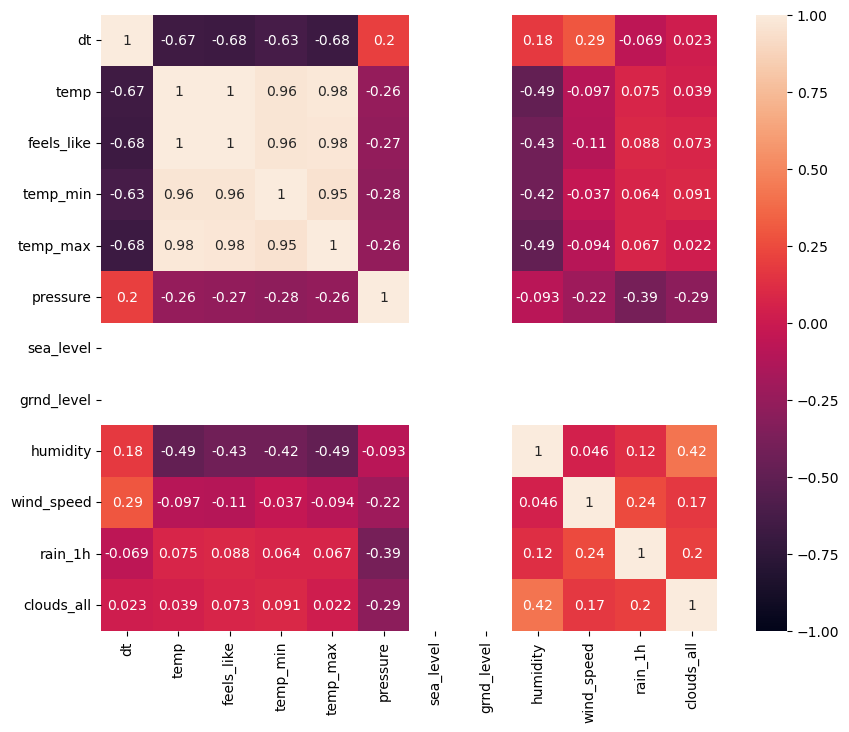

In [7]:
corr_matrix = df_meteo1.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

Based on the above graph, we can see that 'sea_level' and 'grnd_level' have a high number of missing values. We also observe a high correlation among the features 'temp', 'feels_like', 'temp_min', and 'temp_max.' Consequently, these correlated features need to be removed to avoid influencing the results obtained by the machine learning models.